<a href="https://colab.research.google.com/github/itrail/GenderRecognitionCNN/blob/main/GenderRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense 
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator #do kopiowania zdjecia z lekkimi modyfikacjami aby miec więcej próbek do uczenia
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
! cp "/content/drive/My Drive/gender.zip" "gender.zip"

In [ ]:
! unzip gender.zip

In [5]:
#files directories
import os

main_dir = "/content/gender"
train_dir = os.path.join(main_dir,'train')
test_dir = os.path.join(main_dir,'test')
valid_dir = os.path.join(main_dir,'valid')

train_female_dir = os.path.join(train_dir,'woman')
train_male_dir = os.path.join(train_dir,'man')

In [6]:
train_male_names = os.listdir(train_male_dir)
train_female_names = os.listdir(train_female_dir)

In [46]:
#modyfication of data

train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, rotation_range= 40, horizontal_flip= True)
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size = 32, class_mode = 'binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size = 32, class_mode = 'binary')
valid_generator = validation_datagen.flow_from_directory(valid_dir, target_size=(150,150), batch_size = 32, class_mode = 'binary')

Found 1600 images belonging to 2 classes.
Found 340 images belonging to 2 classes.
Found 340 images belonging to 2 classes.


In [47]:
train_generator.class_indices

{'man': 0, 'woman': 1}

In [62]:
model = Sequential()

model.add(Conv2D(16, (3,3),  padding="SAME", activation="relu", input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32, (3,3), padding="SAME", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), padding="SAME", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 37, 37, 64)      

In [63]:
#compliation with adam optimalizer, accuracy metrics and binary crossentropy loss function

model.compile(Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [64]:
#training of neural network

history = model.fit(train_generator, epochs= 30, validation_data= valid_generator)

Epoch 1/30
50/50 [==============================] - 11s 218ms/step - loss: 1.0356 - accuracy: 0.5419 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/30
50/50 [==============================] - 11s 214ms/step - loss: 0.6699 - accuracy: 0.6075 - val_loss: 0.6676 - val_accuracy: 0.5618
Epoch 3/30
50/50 [==============================] - 11s 213ms/step - loss: 0.6433 - accuracy: 0.6125 - val_loss: 0.6026 - val_accuracy: 0.7147
Epoch 4/30
50/50 [==============================] - 11s 217ms/step - loss: 0.5774 - accuracy: 0.7212 - val_loss: 0.5974 - val_accuracy: 0.7500
Epoch 5/30
50/50 [==============================] - 11s 216ms/step - loss: 0.4715 - accuracy: 0.7919 - val_loss: 0.5358 - val_accuracy: 0.7647
Epoch 6/30
50/50 [==============================] - 11s 215ms/step - loss: 0.4268 - accuracy: 0.8106 - val_loss: 0.5136 - val_accuracy: 0.7853
Epoch 7/30
50/50 [==============================] - 11s 215ms/step - loss: 0.4002 - accuracy: 0.8206 - val_loss: 0.5047 - val_accuracy: 0.7882

Text(0.5, 0, 'epoch')

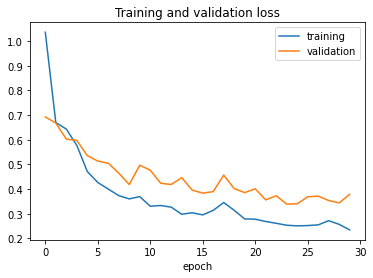

In [65]:
#plot of loss functions

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

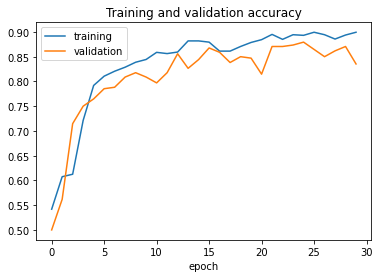

In [66]:
#plot of an accuracies

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [67]:
#result of test

test_loss, test_acc = model.evaluate(test_generator)
print("Test loss: {}, Test accuracy: {}".format(test_loss, test_acc))

11/11 [==============================] - 1s 115ms/step - loss: 0.3627 - accuracy: 0.8647
Test loss: 0.36272233724594116, Test accuracy: 0.8647058606147766


Saving istockphoto-1007763808-612x612.jpg to istockphoto-1007763808-612x612 (7).jpg
Saving Karolina_Gajos_Shell.jpg to Karolina_Gajos_Shell (7).jpg
Saving prince-philip-gt.jpg to prince-philip-gt (7).jpg
Nazwa pliku: istockphoto-1007763808-612x612.jpg


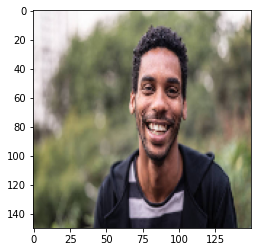

[[0.]]
Nazwa pliku: Karolina_Gajos_Shell.jpg


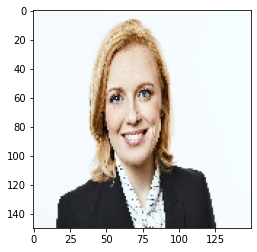

[[1.]]
Nazwa pliku: prince-philip-gt.jpg


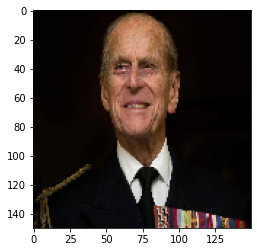

[[0.]]


In [69]:
#trying a neural network in photos from the user's disk

from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()
for fname in uploaded.keys():
  img_path = "/content/"+fname
  img = image.load_img(img_path, target_size=(150, 150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis=0)
  prediction = model.predict(images)
  print("Nazwa pliku: " + fname)
  plt.imshow(img, cmap="gray")

  plt.show()
  print(prediction)

In [70]:
#saving a model of neural network

model.save("model.h5")